In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [124]:
def make_blank_img(height, width, rgb_color=(0, 0, 0)):
    """Create new image(numpy array) filled with certain color in RGB"""
    blank_img = np.zeros((height, width))
    font = cv.FONT_HERSHEY_SIMPLEX
    cv.putText(blank_img, 'ABCDE', (50, 350), font, 5, rgb_color, 25, cv.LINE_AA)
    return blank_img

In [142]:
def display_img(imgs):
    plt.figure(figsize=(12, 10))
    t_len = len(imgs)
    for i, img in enumerate(imgs):
        plt.subplot(1, t_len, i+1)
        plt.imshow(img, 'gray')
        # plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.xticks([])
        plt.yticks([])
    plt.show()

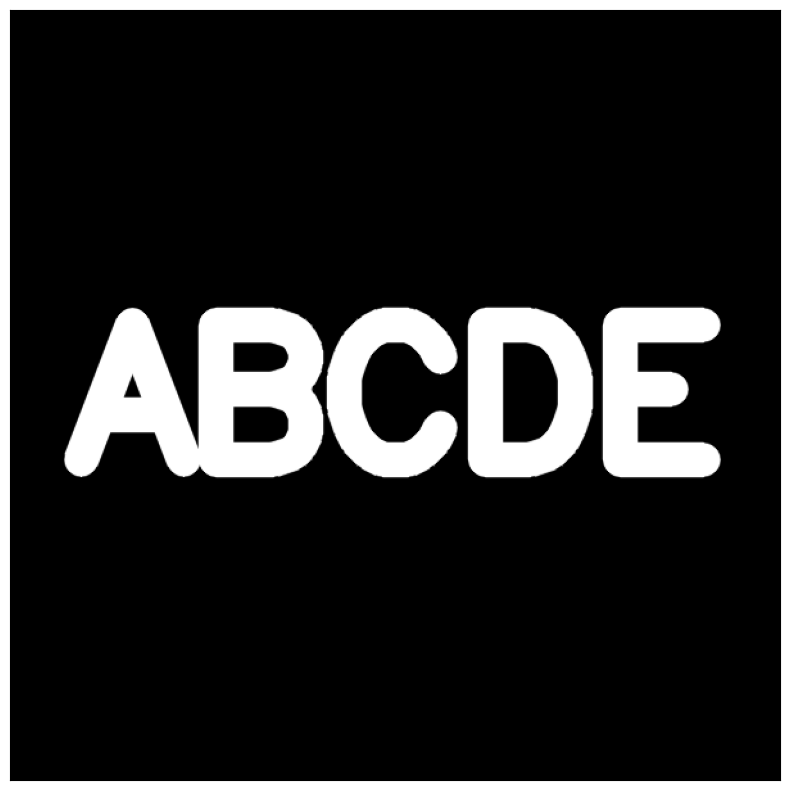

In [56]:
bimg = make_blank_img(600, 600, (255, 255, 255))
display_img([bimg])

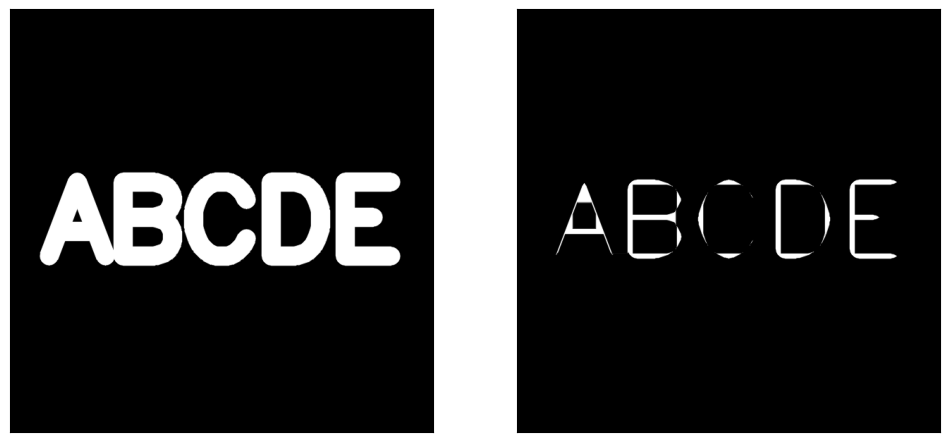

In [57]:
kernel = np.ones((5, 5), np.uint8)
iteration = 5
result = cv.erode(bimg, kernel, iterations=iteration)
display_img([bimg, result])

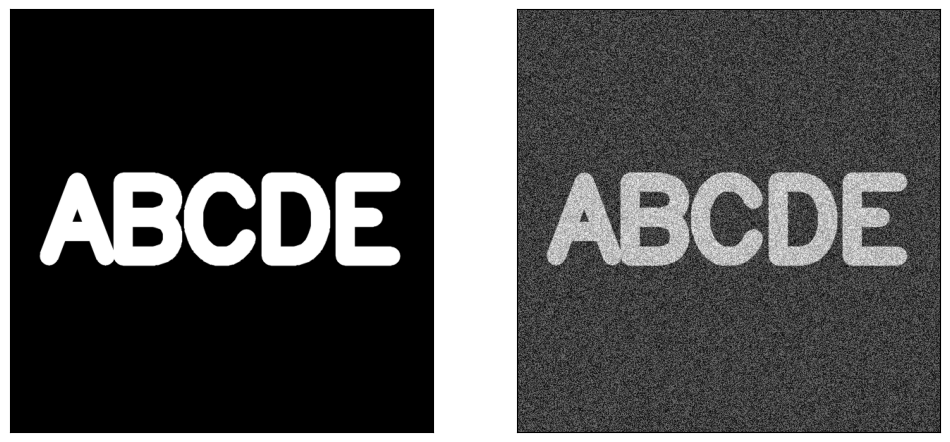

In [58]:
bimg = make_blank_img(600, 600, (255, 255, 255))
white_nosie = np.random.randint(0, 255, (600, 600), dtype=np.uint8)
noise_img = cv.addWeighted(bimg, 0.5, white_nosie, 0.5, 0)
display_img([bimg, noise_img])

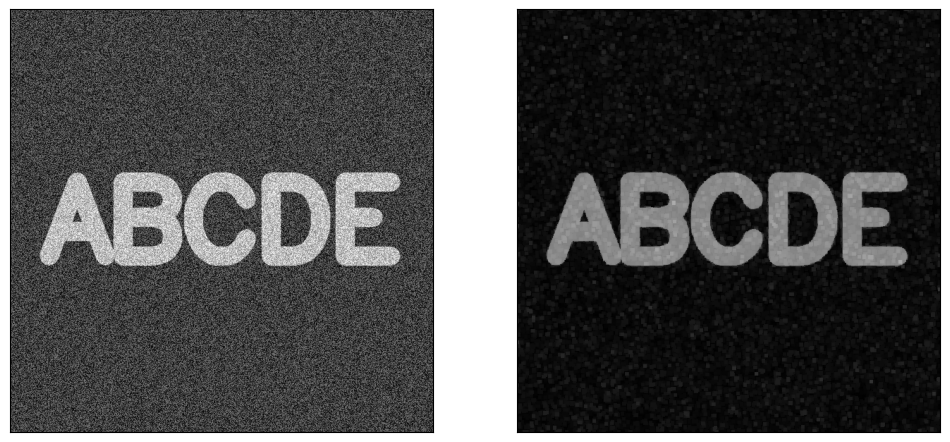

In [59]:
opening = cv.morphologyEx(noise_img, cv.MORPH_OPEN, kernel)
display_img([noise_img, opening])

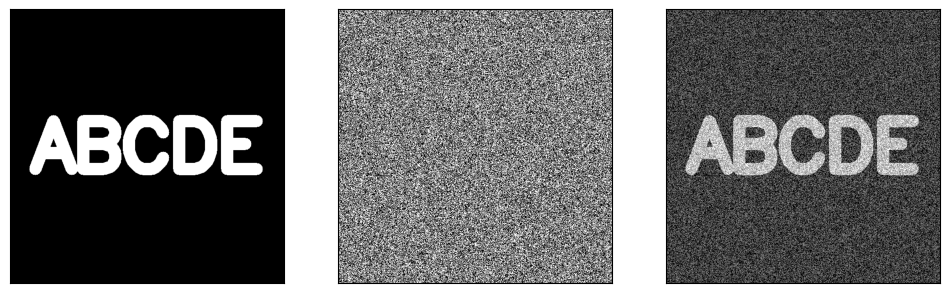

In [147]:
bimg = make_blank_img(600, 600, (255, 255, 255)).astype(np.int16)
black_noise = np.random.randint(0, 2, (600, 600))
black_noise = black_noise*(-bimg.max())
black_noise_img = bimg + black_noise
display_img([bimg, black_noise, black_noise_img])

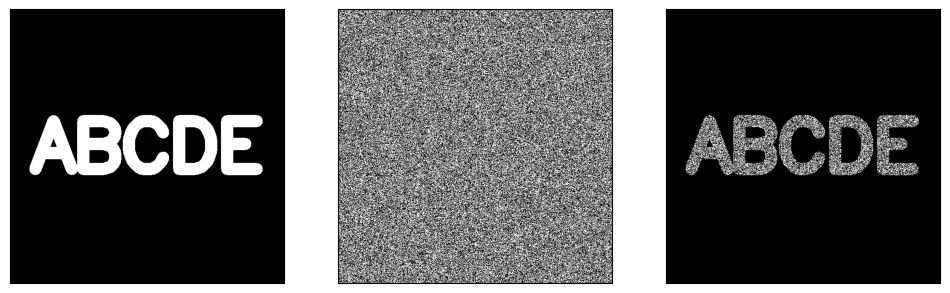

In [150]:
black_noise_img[black_noise_img == -255] = 0
black_noise_img.min()
display_img([bimg, black_noise, black_noise_img])

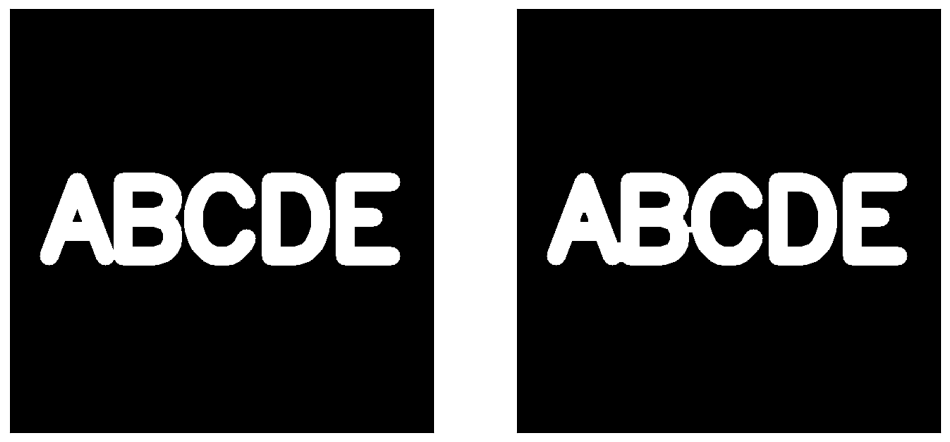

In [152]:
bimg = make_blank_img(600, 600, (255, 255, 255)).astype(np.int16)
closing = cv.morphologyEx(bimg, cv.MORPH_CLOSE, kernel)
display_img([bimg, closing])

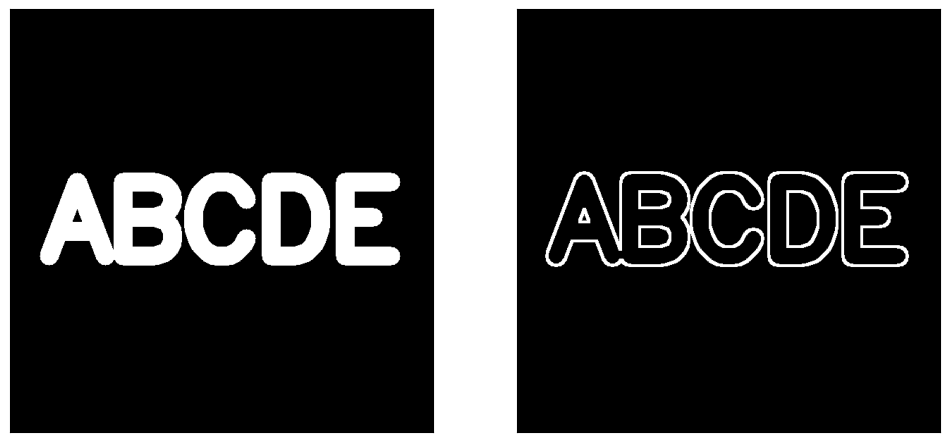

In [151]:
bimg = make_blank_img(600, 600, (255, 255, 255)).astype(np.int16)
gradient = cv.morphologyEx(bimg, cv.MORPH_GRADIENT, kernel)
display_img([bimg, gradient])

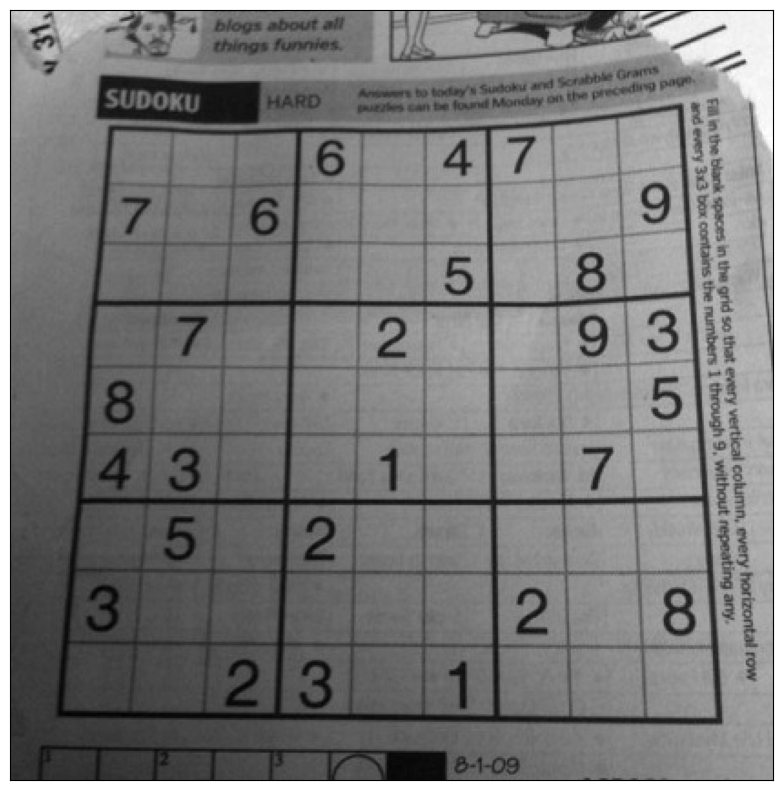

In [153]:
img = cv.imread('./../image/sudoku.jpg', 0)
display_img([img])

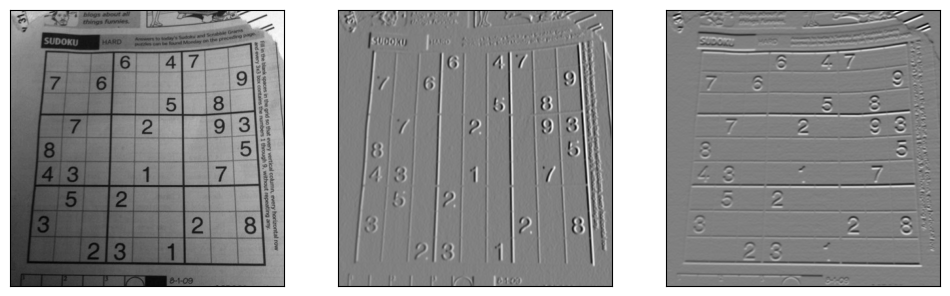

In [154]:
sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=5)
sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=5)
display_img([img, sobelx, sobely])

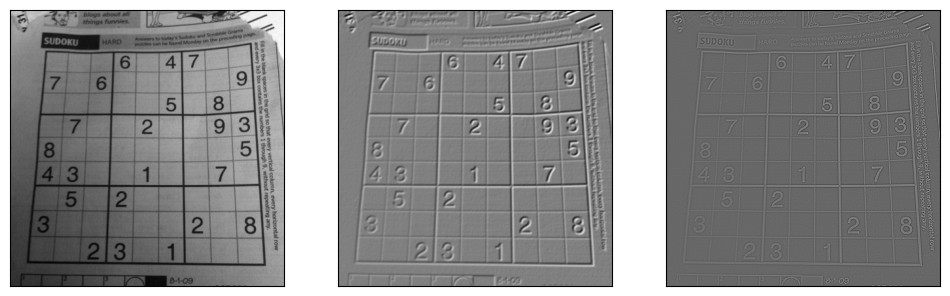

In [157]:
blanded = cv.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
laplacian = cv.Laplacian(img, cv.CV_64F)
display_img([img, blanded, laplacian])

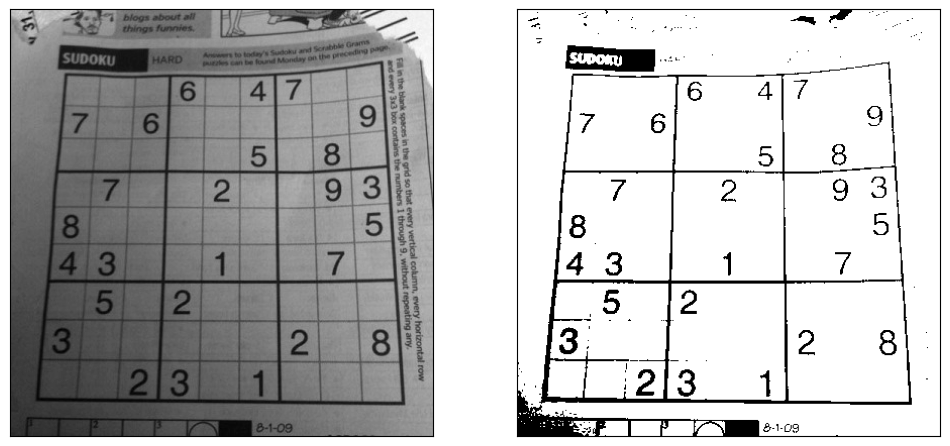

In [162]:
ret, th1 = cv.threshold(img, 50, 255, cv.THRESH_BINARY)
display_img([img, th1])

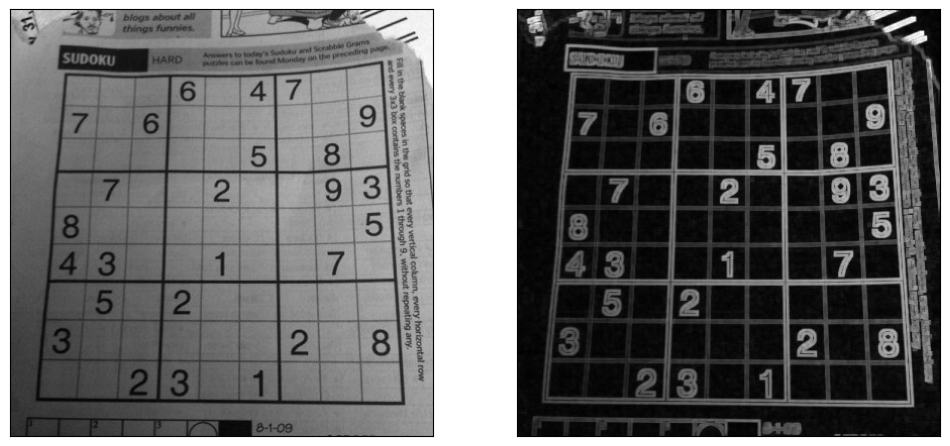

In [163]:
kernel = np.ones((4, 4), np.uint8)
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
display_img([img, gradient])